# Introduction to Time Series

**GOALS**

- Work with `datetime` objects 
- Use descriptive statistics including moving averages to examine timeseries data
- Use `datetime` objects as features
- Use differencing to make time series stationary

## Stock Data

To begin, we consider some data retrieved from Quandl's API.  We can start with data for Apple.  Here, the default table comes back to us with an index as a `datetime` object.  These are special kinds of datatypes that we can use in many ways.  Considering timeseries data, we will usually convert a column to datetime, and set it to the index of the DataFrame.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import quandl
data = quandl.get("WIKI/AAPL")

In [2]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [68]:
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


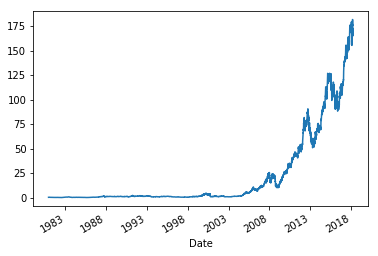

In [4]:
data['Adj. Close'].plot()

In [6]:
data.index.dtype

dtype('<M8[ns]')

In [7]:
data['2018-01']

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-01-02,170.160,172.3000,169.2600,172.26,25048048.0,0.0,1.0,170.160,172.3000,169.2600,172.26,25048048.0
2018-01-03,172.530,174.5500,171.9600,172.23,28819653.0,0.0,1.0,172.530,174.5500,171.9600,172.23,28819653.0
2018-01-04,172.540,173.4700,172.0800,173.03,22211345.0,0.0,1.0,172.540,173.4700,172.0800,173.03,22211345.0
2018-01-05,173.440,175.3700,173.0500,175.00,23016177.0,0.0,1.0,173.440,175.3700,173.0500,175.00,23016177.0
2018-01-08,174.350,175.6100,173.9300,174.35,20134092.0,0.0,1.0,174.350,175.6100,173.9300,174.35,20134092.0
2018-01-09,174.550,175.0600,173.4100,174.33,21262614.0,0.0,1.0,174.550,175.0600,173.4100,174.33,21262614.0
2018-01-10,173.160,174.3000,173.0000,174.29,23589129.0,0.0,1.0,173.160,174.3000,173.0000,174.29,23589129.0
2018-01-11,174.590,175.4886,174.4900,175.28,17523256.0,0.0,1.0,174.590,175.4886,174.4900,175.28,17523256.0
2018-01-12,176.180,177.3600,175.6500,177.09,25039531.0,0.0,1.0,176.180,177.3600,175.6500,177.09,25039531.0


## The `datetime` library

We can use the `datetime` library to examine the behavior of datetime objects.  Also, we can see the `timedelta` method to use arithmetic to transform time values.  Notice that there are many values for the datetime object.  These are:

- `year`
- `month`
- `day'
- `hour`
= `minute`
- `second`
- `microsecond`

In [8]:
import datetime

In [9]:
now = datetime.datetime.now()
now

datetime.datetime(2018, 9, 11, 19, 0, 11, 725773)

In [10]:
now.date()

datetime.date(2018, 9, 11)

In [11]:
now.hour

19

In [12]:
now.day

11

In [13]:
now.month

9

In [14]:
now.minute

0

In [15]:
now.month

9

In [16]:
now.year

2018

In [17]:
now.second

11

In [18]:
now.microsecond

725773

**Timedelta**

If we want to add a time interval, we can use the `timedelta` functionality of `datetime` objects.  

In [20]:
from datetime import timedelta

In [21]:
offset = timedelta(days = 1)

In [22]:
now + offset

datetime.datetime(2018, 9, 12, 19, 0, 11, 725773)

In [23]:
data.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

In [21]:
data.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=9400, freq=None)

In [22]:
data.index.dayofyear

Int64Index([347, 350, 351, 352, 353, 354, 357, 358, 359, 361,
            ...
             73,  74,  75,  78,  79,  80,  81,  82,  85,  86],
           dtype='int64', name='Date', length=9400)

In [24]:
data.to_csv('quandl.csv')

## Linear Regression 

Shout out to https://stackoverflow.com/questions/48614440/cannot-cast-array-data-from-dtypem8ns-to-dtypefloat64-according-to-th.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
dt = data.index.values

In [31]:
X = dt.astype('float')

In [32]:
lr.fit(X.reshape(-1,1), data['Adj. Close'])

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
pred = lr.predict(X.reshape(-1,1))

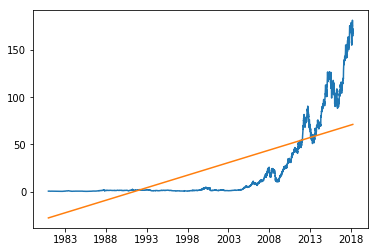

In [34]:
plt.plot(data.index, data['Adj. Close'])
plt.plot(data.index, pred)

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

In [37]:
pipe.fit(X.reshape(-1,1), data['Adj. Close'])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [38]:
pred2 = pipe.predict(X.reshape(-1,1))

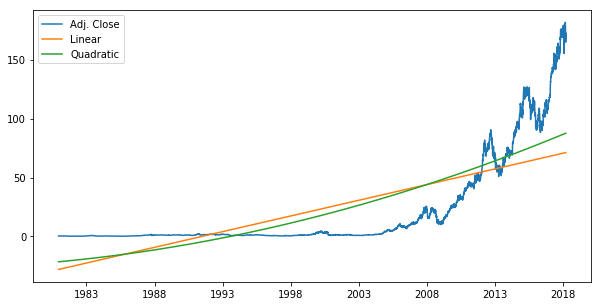

In [39]:
plt.figure(figsize = (10, 5))
plt.plot(data.index, data['Adj. Close'])
plt.plot(data.index, pred, label = 'Linear')
plt.plot(data.index, pred2, label = 'Quadratic')
plt.legend()

In [40]:
pipe2 = make_pipeline(PolynomialFeatures(degree = 7), LinearRegression())
pipe2.fit(X.reshape(-1,1), data['Adj. Close'])
pred3 = pipe2.predict(X.reshape(-1,1))

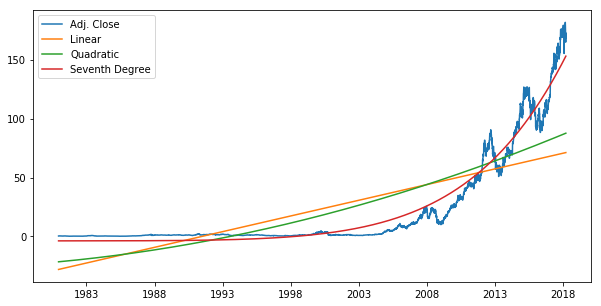

In [41]:
plt.figure(figsize = (10, 5))
plt.plot(data.index, data['Adj. Close'])
plt.plot(data.index, pred, label = 'Linear')
plt.plot(data.index, pred2, label = 'Quadratic')
plt.plot(data.index, pred3, label = 'Seventh Degree')
plt.legend()

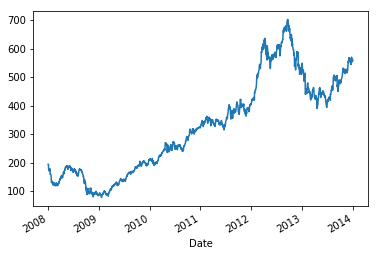

In [37]:
data['2008': '2013']['Close'].plot()

## Rolling and Resampling



In [38]:
data['Close'].resample('M').mean().head()

Date
1980-12-31    30.443077
1981-01-31    31.654762
1981-02-28    26.407895
1981-03-31    24.836364
1981-04-30    27.227143
Freq: M, Name: Close, dtype: float64

In [46]:
data['Close'].resample('Y').last()

Date
1980-12-31     34.1300
1981-12-31     22.1300
1982-12-31     29.8700
1983-12-31     24.3800
1984-12-31     29.1200
1985-12-31     22.0000
1986-12-31     40.5000
1987-12-31     42.0000
1988-12-31     40.2500
1989-12-31     35.2500
1990-12-31     43.0000
1991-12-31     56.3800
1992-12-31     59.7500
1993-12-31     29.2500
1994-12-31     39.0000
1995-12-31     31.8700
1996-12-31     20.8700
1997-12-31     13.1300
1998-12-31     40.9400
1999-12-31    102.8100
2000-12-31     14.8800
2001-12-31     21.9000
2002-12-31     14.3300
2003-12-31     21.3700
2004-12-31     64.4000
2005-12-31     71.8900
2006-12-31     84.8400
2007-12-31    198.0800
2008-12-31     85.3500
2009-12-31    210.7320
2010-12-31    322.5600
2011-12-31    405.0000
2012-12-31    532.1729
2013-12-31    561.0200
2014-12-31    110.3800
2015-12-31    105.2600
2016-12-31    115.8200
2017-12-31    169.2300
2018-12-31    168.3400
Freq: A-DEC, Name: Close, dtype: float64

In [47]:
data['Close'].rolling(window = 5, center = True).mean().head()

Date
1980-12-12       NaN
1980-12-15       NaN
1980-12-16    26.750
1980-12-17    26.650
1980-12-18    27.126
Name: Close, dtype: float64

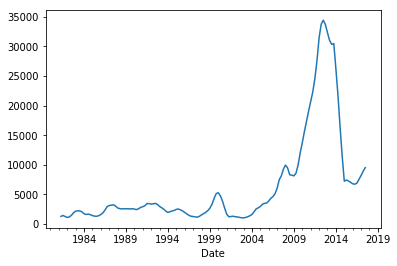

In [48]:
data['Close'].resample('Q').sum().rolling(window = 5, center = True).mean().plot()

In [58]:
expanding_mean = data['Adj. Close'].resample('Q').sum().expanding().mean()

In [59]:
 data.Close.resample('Q').sum().mean()

6341.520246666668

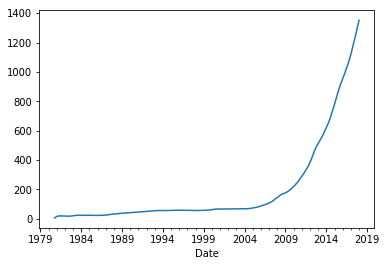

In [60]:
expanding_mean.plot()

In [61]:
exp_weighted_mean = data['Adj. Close'].resample('Q').sum().ewm(span=10).mean()

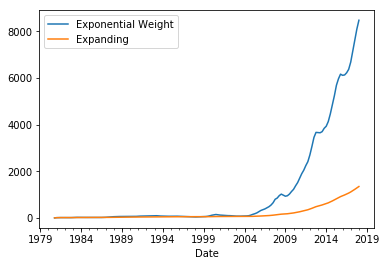

In [62]:
exp_weighted_mean.plot(label = 'Exponential Weight', legend = True)
expanding_mean.plot(label = 'Expanding', legend = True)

## Differencing and Stationarity

In [65]:
diff = data['Adj. Close'].diff(periods = 5)

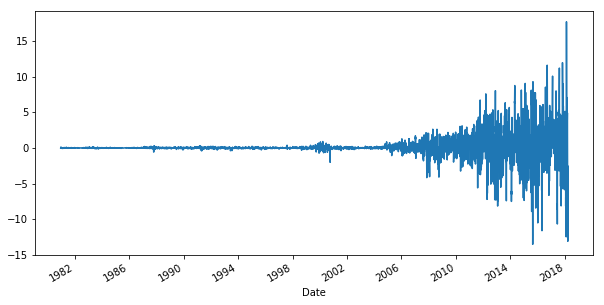

In [66]:
diff.plot(figsize = (10, 5))

## Shifting

In [67]:
diff.mean()

0.08985614673392794

In [68]:
diff.var()

2.2370399066080746

In [69]:
data['prev_close'] = data['Adj. Close'].shift(1).copy()

In [70]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prev_close
Date,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,NaN
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,0.422706
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0,0.400652
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0,0.371246
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0,0.380362


In [71]:
data['close_change'] = data['Adj. Close'] - data['prev_close']

In [72]:
data.head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prev_close,close_change
Date,,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,NaN,NaN
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,0.422706,-0.022054
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0,0.400652,-0.029406
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0,0.371246,0.009116
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0,0.380362,0.011174
1980-12-19,28.25,28.38,28.25,28.25,217100.0,0.0,1.0,0.415355,0.417266,0.415355,0.415355,12157600.0,0.391536,0.023819
1980-12-22,29.63,29.75,29.63,29.63,166800.0,0.0,1.0,0.435644,0.437409,0.435644,0.435644,9340800.0,0.415355,0.020290
1980-12-23,30.88,31.00,30.88,30.88,209600.0,0.0,1.0,0.454023,0.455787,0.454023,0.454023,11737600.0,0.435644,0.018379
1980-12-24,32.50,32.63,32.50,32.50,214300.0,0.0,1.0,0.477841,0.479753,0.477841,0.477841,12000800.0,0.454023,0.023819


### PROBLEM

Alphabet?

In [61]:
data2 = quandl.get("WIKI/GOOGL")

In [62]:
data2.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


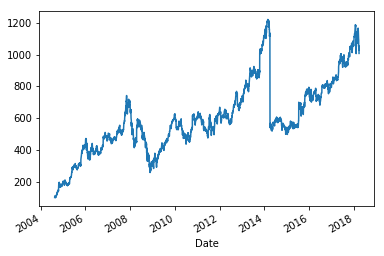

In [63]:
data2['Close'].plot()